# Exploratory Data Analysis 

In the following notebook, we will be exploring our text dataset with the use of charts and word clouds.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df_tweets = pd.read_csv('clean_tweets.csv')

In [3]:
df_tweets.head()

,text,sentiment,clean_tweets
0,"i`d have responded, if i were going",neutral,id respond go
1,sooo sad i will miss you here in san diego!!!,negative,sooo sad miss san diego
2,my boss is bullying me...,negative,boss bulli
3,what interview! leave me alone,negative,interview leav alon
4,"sons of ****, why couldn`t they put them on t...",negative,son whi couldnt put releas whatev alreadi bought


In [4]:
df_tweets.describe()

,text,sentiment,clean_tweets
count,24462,24462,24424
unique,24428,3,23912
top,thank you,positive,happi mother day
freq,3,8582,35


In [5]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24462 entries, 0 to 24461
Data columns (total 3 columns):
text            24462 non-null object
sentiment       24462 non-null object
clean_tweets    24424 non-null object
dtypes: object(3)
memory usage: 573.5+ KB


In [6]:
df_tweets['sentiment'].value_counts()

positive    8582
neutral     8099
negative    7781
Name: sentiment, dtype: int64

## Barplot of Target Values

In the chart below we can see that after downsampling our neutral sentiment, most of the classes are within each others range. Balancing our data is an important step because it will help avoid any added bias within our models. 

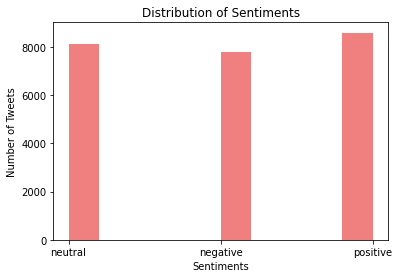

In [7]:
plt.hist(df_tweets['sentiment'], color='lightcoral')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Number of Tweets')
plt.show()

## Most Common Words

In the following tables we will be exploring the most common words for each sentiment. 

In [8]:
from collections import Counter

df_tweets['temp_list'] = df_tweets['clean_tweets'].apply(lambda x:str(x).split())

positive_tweet = df_tweets[df_tweets['sentiment']=='positive']
negative_tweet = df_tweets[df_tweets['sentiment']=='negative']
neutral_tweet = df_tweets[df_tweets['sentiment']=='neutral']

### Positive Tweets
For the positive tweets we can see that most of the common words are love, good, happy, great etc.

In [9]:
top = Counter([item for sublist in positive_tweet['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['positive_words','count']
temp.style.background_gradient(cmap='Blues')

,positive_words,count
0,day,1342
1,love,1182
2,good,1061
3,happi,852
4,thank,826
5,im,743
6,mother,668
7,wa,647
8,go,574
9,hope,519


###  Negative Tweets
For the negative tweets we can see that most of the common words are miss, cant, work, mean etc.

In [10]:
top = Counter([item for sublist in negative_tweet['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['negative_words','count']
temp.style.background_gradient(cmap='YlGn')

,negative_words,count
0,im,1227
1,go,735
2,miss,663
3,get,613
4,thi,546
5,wa,508
6,onlin,501
7,dont,497
8,work,493
9,like,492


###  Neutral Tweets
For the neutral tweets we can see that most of the common words go, get, like, know etc.

In [11]:
top = Counter([item for sublist in neutral_tweet['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['neutral_words','count']
temp.style.background_gradient(cmap='bone')

,neutral_words,count
0,im,771
1,go,738
2,get,612
3,wa,509
4,work,481
5,day,466
6,thi,450
7,mean,426
8,onlin,404
9,got,385


## Word Clouds
Another way we can visualize the text in our corpus is using a word cloud.

In [12]:
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize

df_tweets['clean_tweets'] = df_tweets['clean_tweets'].astype('str')
all_words = []
for sent in df_tweets['clean_tweets']:
    tokenize_word = word_tokenize(sent)
    for word in tokenize_word:
        all_words.append(word)
        
all_words = ','.join(all_words)

In [13]:
all_words

'id,respond,go,sooo,sad,miss,san,diego,boss,bulli,interview,leav,alon,son,whi,couldnt,put,releas,whatev,alreadi,bought,feed,annoy,fun,smile,coo,soooo,high,nan,journey,wow,becam,cooler,hehe,possibl,realli,realli,like,song,love,stori,taylor,swift,sharpi,run,danger,low,ink,want,go,music,tonight,lost,voic,uh,oh,sunburn,sok,tri,plot,altern,whatev,speak,sigh,ive,sick,past,day,thu,hair,look,wierd,didnt,hat,would,look,back,home,gon,na,miss,everi,one,play,ghost,onlin,realli,interest,new,updat,kirin,pet,metamorph,third,job,cant,wait,dragon,pet,clean,hous,famili,com,later,today,see,wat,mean,bout,follw,friiday,call,lose,fllower,friday,smh,free,fillin,app,ipod,fun,im,addict,im,sorri,malaysiano,internet,access,thought,juss,came,backk,berkeleyi,oh,god,madd,fun,havent,minut,whassqoodd,question,went,sleep,power,cut,noida,power,back,work,im,go,home,seen,new,twitter,design,quiteheavenli,hope,unni,make,audit,fight,dahy,unni,comment,ani,consol,got,bmi,test,mean,laugh,say,obes,well,much,unhappi,minut,veri,f

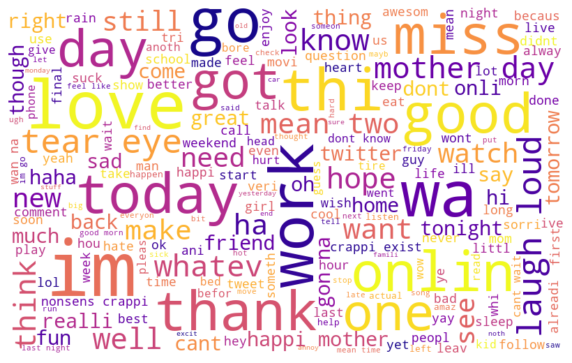

In [14]:

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap='plasma',
                     background_color="white").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()